# Exploratory Data Analysis

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Path to the data folder
data_folder = "data/"

# List all CSV files in the folder
csv_files = [f for f in os.listdir(data_folder) if f.endswith('.csv')]

# Loop through each file, read it, and print the number of entries, the first 5 entries, and the number of null values per column
for csv_file in csv_files:
    file_path = os.path.join(data_folder, csv_file)
    df = pd.read_csv(file_path)
    
    print(f"\n{csv_file}: {len(df)} entries\n")

    print(df.head())

    print("\nNull values per column:")
    print(df.isnull().sum())


teams.csv: 142 entries

   year  lgID tmID franchID confID  divID  rank playoff  seeded firstRound  \
0     9  WNBA  ATL      ATL     EA    NaN     7       N       0        NaN   
1    10  WNBA  ATL      ATL     EA    NaN     2       Y       0          L   
2     1  WNBA  CHA      CHA     EA    NaN     8       N       0        NaN   
3     2  WNBA  CHA      CHA     EA    NaN     4       Y       0          W   
4     3  WNBA  CHA      CHA     EA    NaN     2       Y       0          L   

   ...  GP homeW homeL  awayW  awayL  confW  confL   min  attend  \
0  ...  34     1    16      3     14      2     18  6825  141379   
1  ...  34    12     5      6     11     10     12  6950  120737   
2  ...  32     5    11      3     13      5     16  6475   90963   
3  ...  32    11     5      7      9     15      6  6500  105525   
4  ...  32    11     5      7      9     12      9  6450  106670   

                arena  
0       Philips Arena  
1       Philips Arena  
2  Charlotte Coliseum  
3

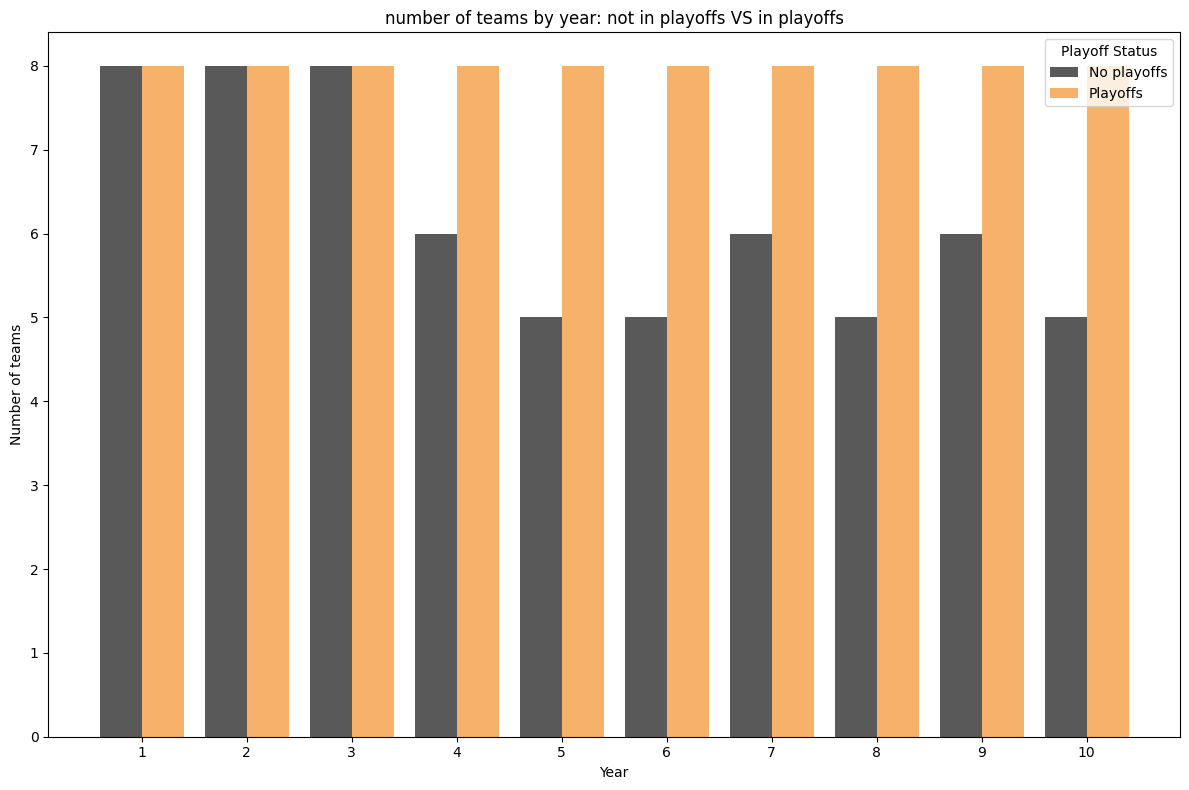

In [2]:
teams_df = pd.read_csv(os.path.join(data_folder, 'teams.csv'))

playoff_counts = teams_df.groupby(['year', 'playoff']).size().unstack(fill_value=0)

playoff_counts = teams_df.groupby(['year', 'playoff']).size().unstack(fill_value=0)

years = playoff_counts.index
teams_no_playoffs = playoff_counts['N']  # Teams not in playoffs
teams_in_playoffs = playoff_counts['Y']  # Teams in playoffs

x = np.arange(len(years))
width = 0.4

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(x - width/2, teams_no_playoffs, width, color='#595959', label='No playoffs')
ax.bar(x + width/2, teams_in_playoffs, width, color='#f6b26a', label='Playoffs')

ax.set_title('number of teams by year: not in playoffs VS in playoffs')
ax.set_xlabel('Year')
ax.set_ylabel('Number of teams')
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=0)
ax.legend(title='Playoff Status')

plt.tight_layout()
plt.show()

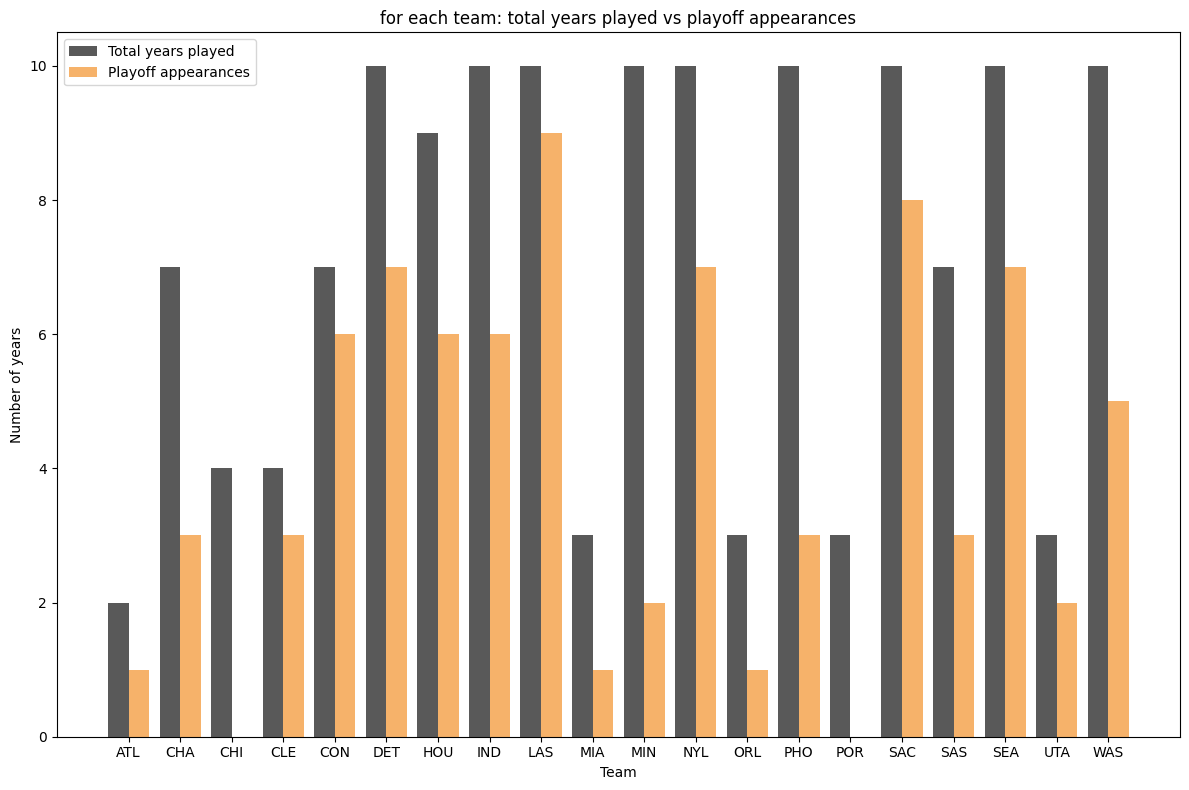

In [3]:
total_years_played = teams_df['tmID'].value_counts().sort_index()
playoff_appearances = teams_df[teams_df['playoff'] == 'Y']['tmID'].value_counts().sort_index()

teams_index = total_years_played.index.union(playoff_appearances.index)
total_years_played = total_years_played.reindex(teams_index, fill_value=0)
playoff_appearances = playoff_appearances.reindex(teams_index, fill_value=0)

x = np.arange(len(teams_index))
width = 0.4

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(x - width/2, total_years_played, width, color='#595959', label='Total years played')
ax.bar(x + width/2, playoff_appearances, width, color='#f6b26a', label='Playoff appearances')

ax.set_title('for each team: total years played vs playoff appearances')
ax.set_xlabel('Team')
ax.set_ylabel('Number of years')
ax.set_xticks(x)
ax.set_xticklabels(teams_index, rotation=0)
ax.legend()

plt.tight_layout()
plt.show()

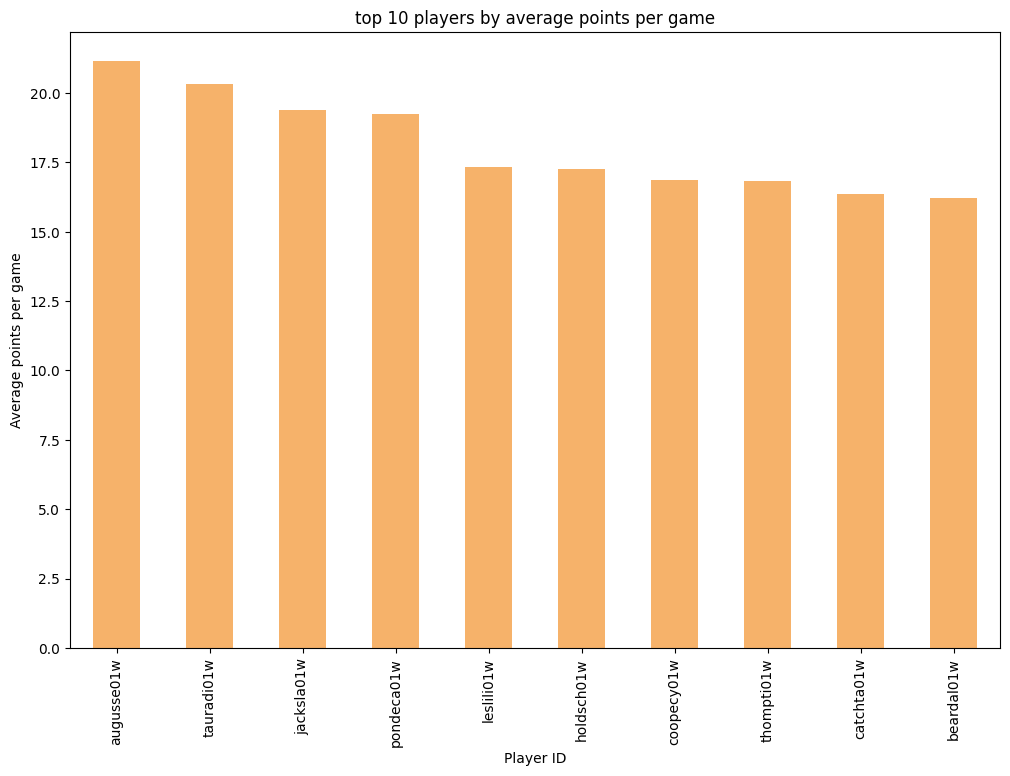

In [4]:
players_df = pd.read_csv(os.path.join(data_folder, 'players_teams.csv'))

# Calculate the average points per game for each player
players_df['avg_points'] = players_df['points'] / players_df['GP']

# Get the top 10 players by average points per game
top_10_players = players_df.groupby('playerID')['avg_points'].mean().nlargest(10)

# Plot the average points per game for the top 10 players
top_10_players.plot(kind='bar', figsize=(12, 8), color='#f6b26a')
plt.title('top 10 players by average points per game')
plt.xlabel('Player ID')
plt.ylabel('Average points per game')
plt.show()

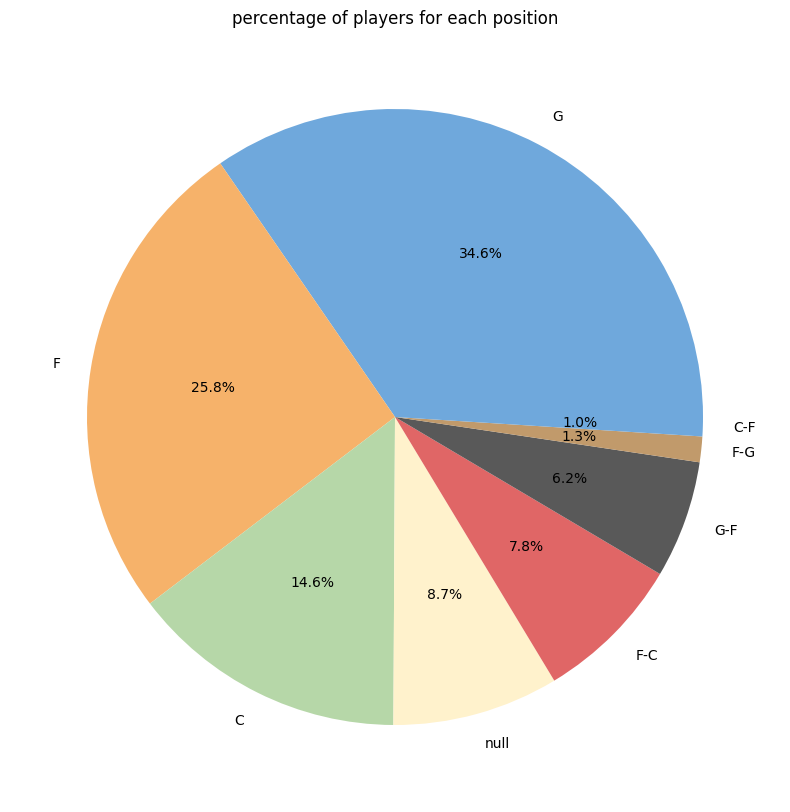

In [5]:
players1_df = pd.read_csv(os.path.join(data_folder, 'players.csv'))

# Fill missing positions with 'null'
players1_df['pos'] = players1_df['pos'].fillna('null')

# Count the number of players in each position
position_counts = players1_df['pos'].value_counts()

# Calculate the percentage of each position
position_percentages = position_counts / position_counts.sum() * 100

colors = [
    '#6fa8dc',
    '#f6b26a',
    '#b6d7a8',
    '#fff2cc',
    '#e06666',
    '#595959',
    '#c19a6b'
]

position_percentages.plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%', colors=colors)
plt.title('percentage of players for each position')
plt.ylabel('')
plt.show()

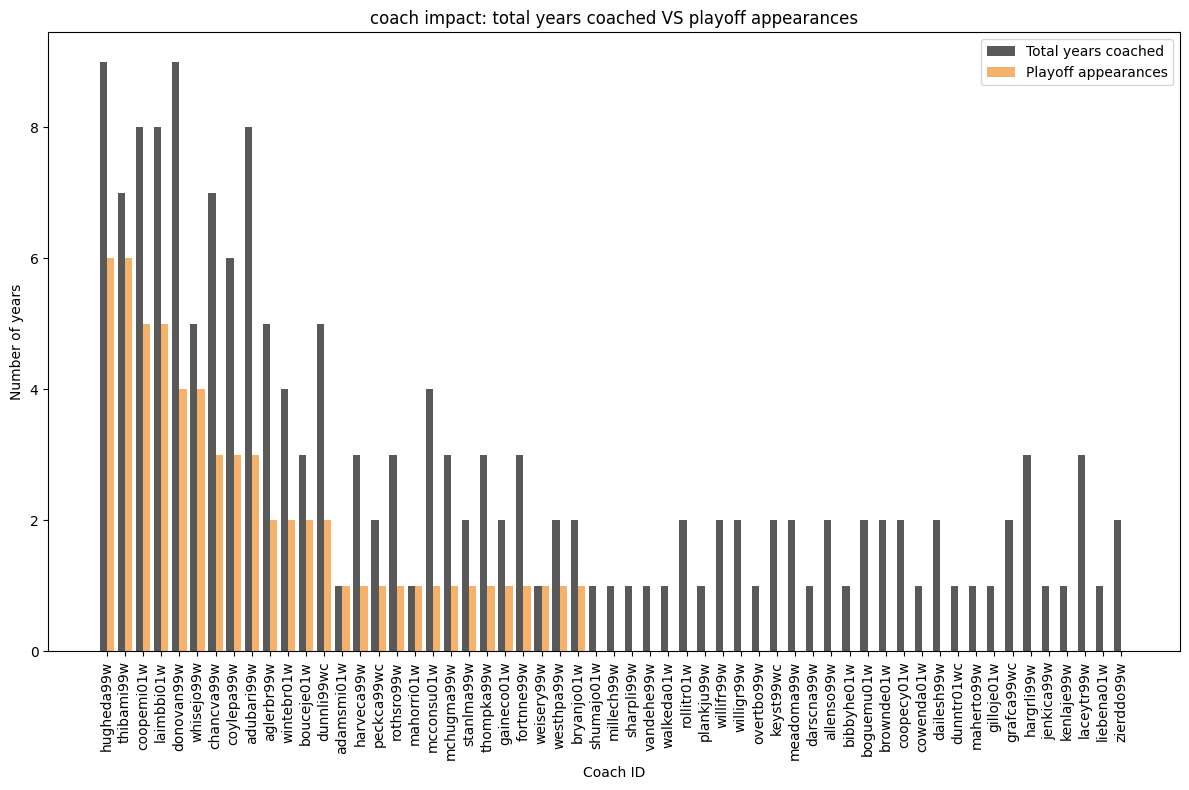

In [ ]:
coaches_df = pd.read_csv(os.path.join(data_folder, 'coaches.csv'))

coaches_df['playoff'] = coaches_df.apply(lambda row: 1 if row['post_wins'] > 0 and row['post_losses'] > 0 else 0, axis=1)

coach_stats = coaches_df.groupby('coachID').agg(
    playoff_appearances=('playoff', 'sum'),
    total_years_coached=('year', 'count')
).sort_values(by='playoff_appearances', ascending=False)

x = np.arange(len(coach_stats))
width = 0.4

fig, ax = plt.subplots(figsize=(18, 8))

# Plot the total years coached
ax.bar(x - width/2, coach_stats['total_years_coached'], width, color='#595959', label='Total years coached')

# Plot the playoff appearances
ax.bar(x + width/2, coach_stats['playoff_appearances'], width, color='#f6b26a', label='Playoff appearances')

# Add titles, labels, and legend
ax.set_title('coach impact: total years coached VS playoff appearances')
ax.set_xlabel('Coach ID')
ax.set_ylabel('Number of years')
ax.set_xticks(x)
ax.set_xticklabels(coach_stats.index, rotation=90)  # Rotate labels for better readability
ax.legend()

plt.tight_layout()
plt.show()